In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'


# Load data
train_data = pd.read_csv('../data/Train.csv')
val_data = pd.read_csv('../data/Validate.csv')
test_data = pd.read_csv('../data/Test.csv')

# ID,Married,Gender,Age,Graduate,Profession,Years_of_Working ,Spending_Score,Family_Members,Category,Class(Target)
# ID : int
# Married : 0/1 NAN -> -1
# Gender : 0/1 NAN -> -1
# Age : int NAN -> -1
# Graduate : 0/1 NAN -> -1
# Profession : string -> LabelEncoder NAN -> "Unknown"
# Years_of_Working : int NAN -> -1
# Spending_Score : string -> LabelEncoder NAN -> "Unknown"
# Family_Members : int NAN -> -1
# Category : string -> LabelEncoder NAN -> "Unknown"
# Class(Target): string -> LabelEncoder NAN -> "Unknown"

# Preprocess data
def preprocess_data(data):
    # Fill missing values for string columns with the mode (most frequent value)
    data['Married'] = data['Married'].fillna(data['Married'].mode()[0])  # Most frequent value
    data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])  # Most frequent value
    data['Profession'] = data['Profession'].fillna(data['Profession'].mode()[0])  # Most frequent value
    data['Spending_Score'] = data['Spending_Score'].fillna(data['Spending_Score'].mode()[0])  # Most frequent value
    data['Category'] = data['Category'].fillna(data['Category'].mode()[0])  # Most frequent value

    # Fill missing values for numerical columns with the mean and round to nearest integer
    data['Age'] = data['Age'].fillna(data['Age'].mean()).round().astype(int)  # Mean and rounding
    data['Years_of_Working '] = data['Years_of_Working '].fillna(data['Years_of_Working '].mean()).round().astype(int)  # Mean and rounding
    data['Family_Members'] = data['Family_Members'].fillna(data['Family_Members'].mean()).round().astype(int)  # Mean and rounding

    # Fill missing values for binary columns (0/1) with the most frequent value
    data['Graduate'] = data['Graduate'].fillna(data['Graduate'].mode()[0])  # Most frequent value
    data['Married'] = data['Married'].fillna(data['Married'].mode()[0])  # Most frequent value

    # Label encoding for string columns
    le = LabelEncoder()
    data['Married'] = le.fit_transform(data['Married'])
    data['Gender'] = le.fit_transform(data['Gender'])
    data['Graduate'] = le.fit_transform(data['Graduate'])
    data['Profession'] = le.fit_transform(data['Profession'])
    data['Spending_Score'] = le.fit_transform(data['Spending_Score'])
    data['Category'] = le.fit_transform(data['Category'])
    data['Class(Target)'] = le.fit_transform(data['Class(Target)'])
    return data

train_data = preprocess_data(train_data)
val_data = preprocess_data(val_data)
test_data = preprocess_data(test_data)

# Split data
X_train = train_data.drop(['ID','Class(Target)'],axis=1)
y_train = train_data['Class(Target)']
X_val = val_data.drop(['ID','Class(Target)'],axis=1)
y_val = val_data['Class(Target)']
X_test = test_data.drop(['ID','Class(Target)'],axis=1)
y_test = test_data['Class(Target)']

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(X_train,X_train.shape)
print(y_train,y_train.shape)
print(X_val,X_val.shape)
print(y_val,y_val.shape)
print(X_test,X_test.shape)
print(y_test,y_test.shape)

[[ 0.90791946  1.19816059 -0.4430708  ...  0.74762549 -0.56061626
   0.60143067]
 [-1.10141929  1.19816059  0.33542047 ...  0.74762549 -1.22802506
   0.60143067]
 [-1.10141929 -0.83461266 -1.10179418 ...  0.74762549 -1.22802506
  -1.5265993 ]
 ...
 [-1.10141929 -0.83461266  1.35344752 ... -1.6101976  -0.56061626
   0.60143067]
 [ 0.90791946 -0.83461266  2.19182273 ...  0.74762549 -0.56061626
   0.60143067]
 [-1.10141929  1.19816059 -1.28144601 ...  0.74762549  0.77420134
   0.60143067]] (7487, 9)
0       2
1       0
2       1
3       0
4       0
       ..
7482    1
7483    3
7484    3
7485    3
7486    1
Name: Class(Target), Length: 7487, dtype: int64 (7487,)
[[-1.10141929 -0.83461266 -0.4430708  ...  0.74762549 -0.56061626
   0.60143067]
 [ 0.90791946 -0.83461266 -0.02388319 ... -0.43128606  0.77420134
   0.60143067]
 [-1.10141929 -0.83461266  0.57495625 ... -1.6101976   0.77420134
   0.60143067]
 ...
 [-1.10141929  1.19816059 -1.28144601 ...  0.74762549  1.44161014
   0.60143067]
 [ 

In [ ]:
# Convert to tensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train = torch.from_numpy(X_train).float().to(device)
y_train = torch.from_numpy(y_train.values).long().to(device)
X_val = torch.from_numpy(X_val).float().to(device)
y_val = torch.from_numpy(y_val.values).long().to(device)
X_test = torch.from_numpy(X_test).float().to(device)
y_test = torch.from_numpy(y_test.values).long().to(device)

# Create dataloader
X_train = X_train.unsqueeze(1)
X_val = X_val.unsqueeze(1)
X_test = X_test.unsqueeze(1)

In [12]:
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Training: 100%|██████████| 200/200 [01:56<00:00,  1.71it/s, train_loss=1.1301, val_loss=1.2083]


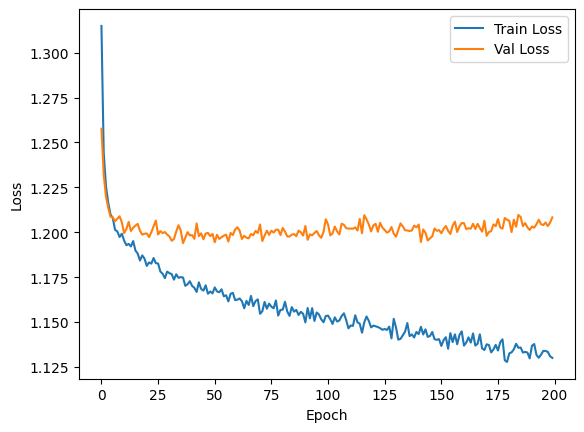

Accuracy: 46.49%


In [13]:
# Define model
import torch.nn as nn
from torch.nn import functional as F

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)  
        self.fc3 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
    
class CNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64*input_size, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)
        

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

    
# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
num_classes = len(np.unique(y_train.cpu().numpy()))  # Ensure num_classes matches the unique classes in y_train
num_epochs = 200
learning_rate = 0.001

# Initialize model
# model = Net(input_size, hidden_size, num_classes).to(device)
model = CNN(input_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

# Train model
train_losses = []
val_losses = []

from tqdm import tqdm
with tqdm(total=num_epochs, desc='Training') as pbar:
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for i, (X_batch, y_batch) in enumerate(train_loader):
            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        
        pbar.set_postfix({"train_loss": f"{train_loss:.4f}", "val_loss": f"{val_loss:.4f}"})
        pbar.update(1)
        
    
# Plot losses
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        
print(f'Accuracy: {correct/total * 100:.2f}%')

# Save model
torch.save(model.state_dict(), 'model.pth')